# Flipkart - The Indian Amazon

# Contents

- [Data](#Data)
- [Objectives](#Objectives)
- [Imports](#Imports)
- [Cleaning and Prep](#Cleaning-and-Prep)
- [Sales](#Sales)
- [Discounted Sales](#Discounted-Sales)
- [Conclusion](#Conclusion)
- [Feedback](#Feedack-is-appreciated!!-Thank-you.)

# Data

[Flipkart](https://www.flipkart.com) is the largest Indian Ecommerce site. Started in 2007 by two ex Amazon employees, [Sachin Bansal](https://en.wikipedia.org/wiki/Sachin_Bansal) and [Binny Bansal](https://en.wikipedia.org/wiki/Binny_Bansal), Flipkart started off by selling books and eventually moving on to other goods, such as clothing, electronics and other consumables. For more information about Flipkart, check out there [Wikipedia](https://en.wikipedia.org/wiki/Flipkart) page. Courtesy to [Promptcloud](https://www.promptcloud.com/datastock-access-ready-to-use-datasets) and Kaggle for making this dataset possible!

# Objectives

 - What does the data look like? Missing? Duplicates? Nan values? 
 - Does the Data need preparation? Datetime? Better categories? 
 - Which months/years have the most sales?
 - Which categories have the most sales?
 - Which categories have the best discounts by percentage?

# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [9]:
cd flipkart_com-ecommerce_sample.csv

[Errno 20] Not a directory: 'flipkart_com-ecommerce_sample.csv'
/Users/julio0703/Downloads/downloaded_data_folder


In [300]:
df = pd.read_csv('flipkart_com-ecommerce_sample.csv')

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
uniq_id                    20000 non-null object
crawl_timestamp            20000 non-null object
product_url                20000 non-null object
product_name               20000 non-null object
product_category_tree      20000 non-null object
pid                        20000 non-null object
retail_price               19922 non-null float64
discounted_price           19922 non-null float64
image                      19997 non-null object
is_FK_Advantage_product    20000 non-null bool
description                19998 non-null object
product_rating             20000 non-null object
overall_rating             20000 non-null object
brand                      14136 non-null object
product_specifications     19986 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 2.2+ MB


In [529]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,overall_rating,brand,product_specifications,MainCategory,SecondaryCategory,TertiaryCategory,QuaternaryCategory,crawl_year,crawl_month,discount_%
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,2016,3,62.1
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,2016,3,29.6
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear,Women's Footwear,Ballerinas,"AW Bellies""]",2016,3,50.1
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,2016,3,61.8
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies,Grooming,Skin & Coat Care,Shampoo,2016,3,4.5


# Cleaning and Prep

The cleaning and prep section will consist of searching for missing data, looking for duplicate data, converting the time column to a pandas Timestamp object and sectioning off the timestamp column into a month column and a year column.

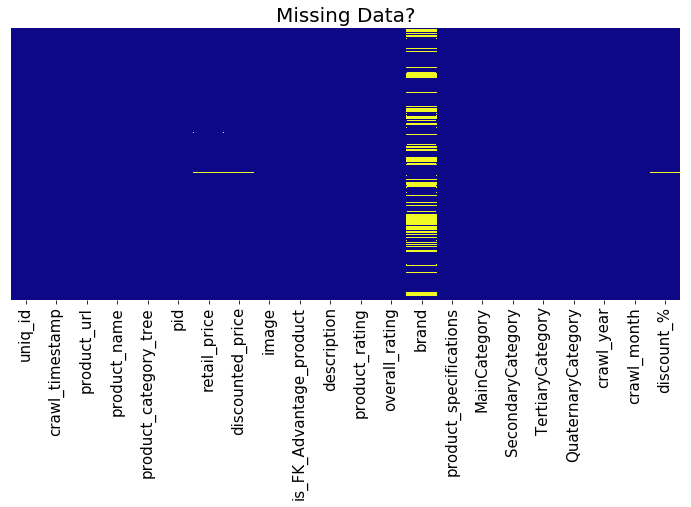

In [485]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),
            cmap='plasma',
            yticklabels=False,
            cbar=False)
plt.title('Missing Data?',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

The Brand column is missing a hefty amount of data. Everything else looks relatively complete.

In [440]:
df.duplicated().value_counts()

False    20000
dtype: int64

No duplicate data

In [ ]:
#make this column into a datetime type for workability

df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'])

In [ ]:
df['crawl_year'] = df['crawl_timestamp'].apply(lambda x: x.year)
df['crawl_month'] = df['crawl_timestamp'].apply(lambda x: x.month)

Now let's look at the product_category_tree column. This is a juicy column that can be divided up into subcategory columns. Below is how the column looks like and how we will divide it.

In [514]:
print(df.product_category_tree[1])
print('\n')

for i in df.product_category_tree[1].split('>>'):
    print(i)

["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]


["Furniture 
 Living Room Furniture 
 Sofa Beds & Futons 
 FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]


In [445]:
df.product_category_tree[10].split('>>')[1][1:]

"Women's Footwear "

In [446]:
df['MainCategory'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0][2:])

In [447]:
def secondary(x):
    try:
        return x.split('>>')[1][1:]
    except IndexError:
        return 'None '
    
def tertiary(x):
    try:
        return x.split('>>')[2][1:]
    except IndexError:
        return 'None '
    
def quaternary(x):
    try:
        return x.split('>>')[3][1:]
    except IndexError:
        return 'None '

In [448]:
df['SecondaryCategory'] = df['product_category_tree'].apply(secondary)
df['TertiaryCategory'] = df['product_category_tree'].apply(tertiary)
df['QuaternaryCategory'] = df['product_category_tree'].apply(quaternary)

# Sales

Now that we have spruced up our data, let's visualize some sales!! First by month and year. After visualizing by time, we will visualize by category.

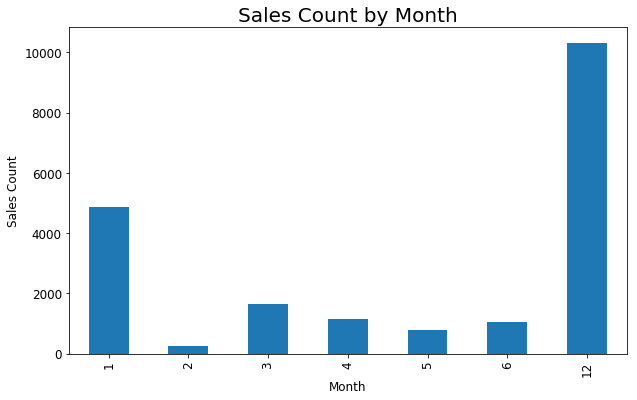

crawl_month
1      4850
2       245
3      1634
4      1137
5       773
6      1046
12    10315
Name: crawl_month, dtype: int64


In [482]:
plt.figure(figsize=(10,6))
df.groupby('crawl_month')['crawl_month'].count().plot(kind='bar')
plt.title('Sales Count by Month',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Sales Count',fontsize=12)
plt.show()
print(df.groupby('crawl_month')['crawl_month'].count())

Does anyone else see something funny going on here? Where is the data for July - November? Hmm.

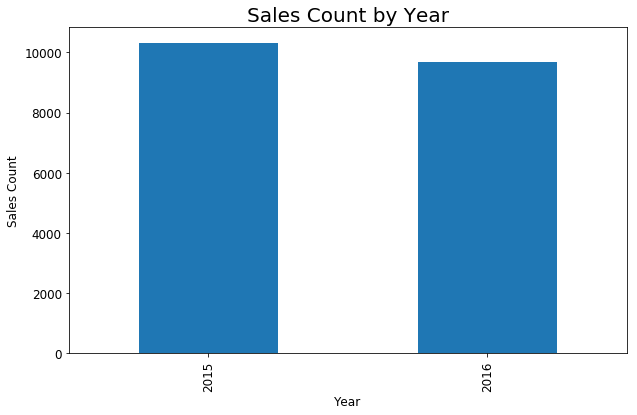

crawl_year
2015    10315
2016     9685
Name: crawl_year, dtype: int64


In [487]:
plt.figure(figsize=(10,6))
df.groupby('crawl_year')['crawl_year'].count().plot(kind='bar')
plt.title('Sales Count by Year',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales Count',fontsize=12)
plt.show()
print(df.groupby('crawl_year')['crawl_year'].count())

Only two years worth of data here. Nothing very insightful here.

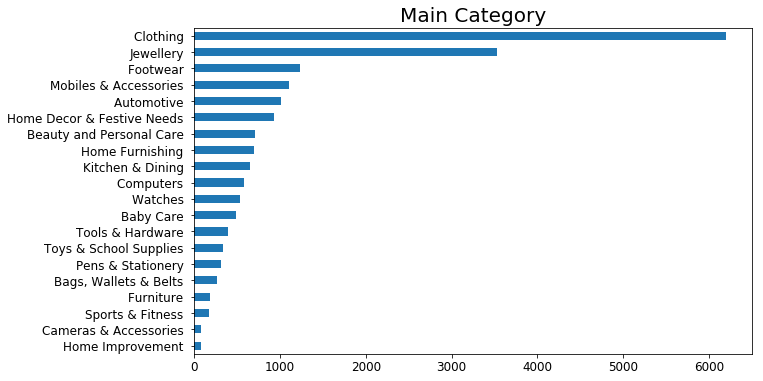

Top Ten Main Categories by Sales.

Clothing                       6198
Jewellery                      3531
Footwear                       1227
Mobiles & Accessories          1099
Automotive                     1012
Home Decor & Festive Needs      929
Beauty and Personal Care        710
Home Furnishing                 700
Kitchen & Dining                647
Computers                       578
Name: MainCategory, dtype: int64


In [459]:
plt.figure(figsize=(10,6))
df['MainCategory'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Main Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Ten Main Categories by Sales.\n')
print(df['MainCategory'].value_counts()[:10])

Clothing, Jewellery, Shoes, electronics and automotive are the main category winners!

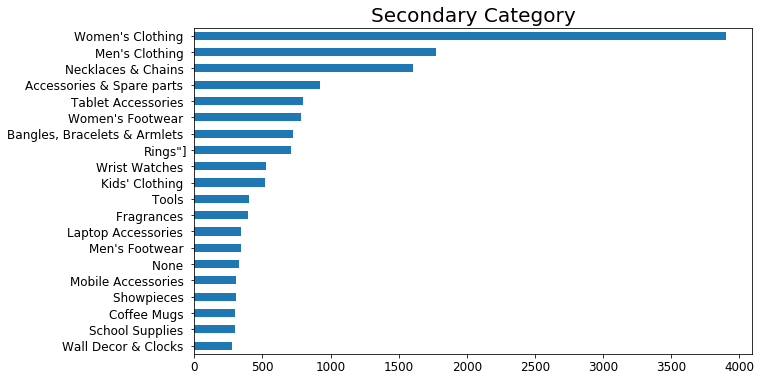

Top Ten Secondary Categories by Sales.

Women's Clothing                 3901
Men's Clothing                   1773
Necklaces & Chains               1606
Accessories & Spare parts         925
Tablet Accessories                801
Women's Footwear                  781
Bangles, Bracelets & Armlets      724
Rings"]                           710
Wrist Watches                     523
Kids' Clothing                    520
Name: SecondaryCategory, dtype: int64


In [461]:
plt.figure(figsize=(10,6))
df['SecondaryCategory'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Secondary Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Ten Secondary Categories by Sales.\n')
print(df['SecondaryCategory'].value_counts()[:10])

This is interesting. Women's Clothing is more than double of men's clothing. It is clear now that a lot of the users on Flipkart are Women, though there is no gender column. As if that is not enough, look at 'Necklaces', 'Women's Footwear', 'Rings' and 'Kid's Clothing'.

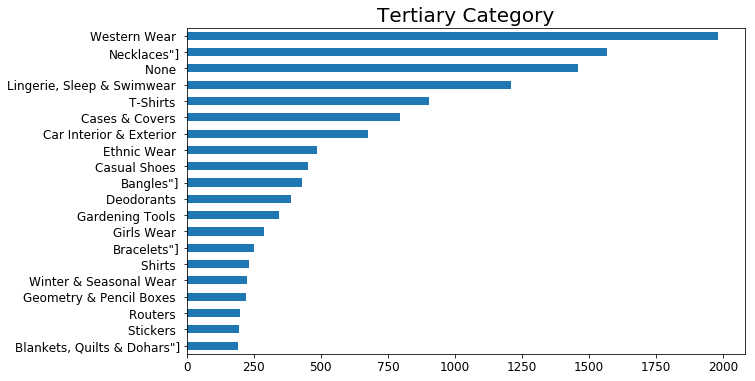

Top Ten Tertiary Categories by Sales.

Western Wear                   1981
Necklaces"]                    1567
None                           1457
Lingerie, Sleep & Swimwear     1208
T-Shirts                        903
Cases & Covers                  796
Car Interior & Exterior         677
Ethnic Wear                     485
Casual Shoes                    454
Bangles"]                       430
Name: TertiaryCategory, dtype: int64


In [462]:
plt.figure(figsize=(10,6))
df['TertiaryCategory'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Tertiary Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Ten Tertiary Categories by Sales.\n')
print(df['TertiaryCategory'].value_counts()[:10])

Western Wear? What does that mean?? Does that mean I want to look like a cowboy/cowgirl or does that mean I want to look like I live in Los Angeles?

In [497]:
df[df['TertiaryCategory']=='Western Wear ']['product_name'][60:70]

477        Megha Casual Short Sleeve Printed Women's Top
483    SFDS Casual, Formal, Party Short Sleeve Self D...
484    SFDS Casual, Formal, Party Sleeveless Self Des...
485    SFDS Casual, Formal, Party Sleeveless Self Des...
486    SFDS Casual, Formal, Party Short Sleeve Self D...
487    SFDS Casual, Formal, Party Sleeveless Self Des...
489    SFDS Casual, Formal, Party Sleeveless Self Des...
490    SFDS Casual, Formal, Party Short Sleeve Self D...
508                             Escocer Women's Leggings
516      Ozel Studio Casual 3/4 Sleeve Solid Women's Top
Name: product_name, dtype: object

[Here](https://www.google.com/search?q=Megha+Casual+Short+Sleeve+Printed+Women%27s+Top&safe=off&client=firefox-b-1&source=lnms&tbm=isch&sa=X&ved=2ahUKEwirgMLc-draAhUL8IMKHd7YDZ4Q_AUoAXoECAAQAw&biw=1440&bih=735) is one google image search result. After doing a few more, I'm going to guess Western wear to mean California wear over the wild west. 

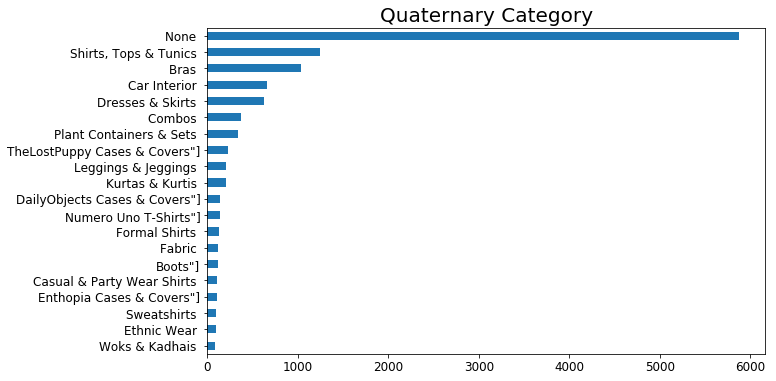

Top Ten Quaternary Categories by Sales.

None                             5876
Shirts, Tops & Tunics            1249
Bras                             1036
Car Interior                      659
Dresses & Skirts                  620
Combos                            375
Plant Containers & Sets           333
TheLostPuppy Cases & Covers"]     229
Leggings & Jeggings               209
Kurtas & Kurtis                   202
Name: QuaternaryCategory, dtype: int64


In [463]:
plt.figure(figsize=(10,6))
df['QuaternaryCategory'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Quaternary Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Ten Quaternary Categories by Sales.\n')
print(df['QuaternaryCategory'].value_counts()[:10])

The Quaternary graph has lost a lot of insight. Nearly 6000 'None' values.

Out of curiousity, what is the most expensive item in Flipkart during this time???

In [515]:
df['retail_price'].max()

571230.0

In [352]:
df[df['retail_price']==571230.000000]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,overall_rating,brand,product_specifications,MainCategory,SecondaryCategory,TertiaryCategory,QuaternaryCategory,crawl_year,crawl_month,discount_%
116,329c5f4d7aced63e1ce3e88f41d5e7e6,2015-12-04 07:25:36,http://www.flipkart.com/breitling-ab011010-bb0...,Breitling AB011010/BB08 131S Chronomat 44 Anal...,"[""Watches >> Wrist Watches >> Breitling Wrist ...",WATE9DX9E4YSRJSY,571230.0,571230.0,"[""http://img5a.flixcart.com/image/watch/j/s/y/...",False,...,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",Watches,Wrist Watches,"Breitling Wrist Watches""]",None,2015,12,0.0


A wrist watch!!!

# Discounted Sales

For the discounted sales section, we are going to have to do some data manipulation beforehand. First, we are going to create a discounted percentage column by subtracting the discount price from the retail price and dividing that amount by the retail price. 

In [517]:
#discount percent = ((retail - sale) / retail) * 100

df['discount_%'] = round(((df['retail_price'] - df['discounted_price']) / df['retail_price'] * 100),1) 

In [518]:
df[['product_name','retail_price','discounted_price','discount_%']].head()

,product_name,retail_price,discounted_price,discount_%
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,62.1
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,29.6
2,AW Bellies,999.0,499.0,50.1
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,61.8
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,4.5


Second, we are going to create a few new dataframes that contain the product by category, average discounted percentages and count of each product.

In [519]:
MainCategoryDiscount = pd.DataFrame(df.groupby('MainCategory').agg({
    'discount_%':[(np.mean)],
    'MainCategory':['count']
}))

SecondaryCategoryDiscount = pd.DataFrame(df.groupby('SecondaryCategory').agg({
    'discount_%':[np.mean],
    'SecondaryCategory':['count']
}))

TertiaryCategoryDiscount = pd.DataFrame(df.groupby('TertiaryCategory').agg({
    'discount_%':[np.mean],
    'TertiaryCategory':['count']
}))

QuaternaryCategoryDiscount = pd.DataFrame(df.groupby('QuaternaryCategory').agg({
    'discount_%':[np.mean],
    'QuaternaryCategory':['count']
}))

In [520]:
MainCategoryDiscount.head()

,discount_%,MainCategory
,mean,count
MainCategory,,
"883 Police Full Sleeve Solid Men's Jacket""]",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""]",27.6,1
"ANAND ARCHIES Girls Flats""]",10.0,2
"ANAND ARCHIES Girls Wedges""]",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""]",0.0,1


Third, we are going to combine the levels of the columns for visualization purposes.

In [521]:
MainCategoryDiscount.columns = ['_'.join(col) for col in MainCategoryDiscount.columns]
SecondaryCategoryDiscount.columns = ['_'.join(col) for col in SecondaryCategoryDiscount.columns]
TertiaryCategoryDiscount.columns = ['_'.join(col) for col in TertiaryCategoryDiscount.columns]
QuaternaryCategoryDiscount.columns = ['_'.join(col) for col in QuaternaryCategoryDiscount.columns]

In [522]:
MainCategoryDiscount.head()

,discount_%_mean,MainCategory_count
MainCategory,,
"883 Police Full Sleeve Solid Men's Jacket""]",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""]",27.6,1
"ANAND ARCHIES Girls Flats""]",10.0,2
"ANAND ARCHIES Girls Wedges""]",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""]",0.0,1


In [523]:
MainCategoryDiscount = MainCategoryDiscount.sort_values(by=['MainCategory_count'],ascending=False)[:20]
SecondaryCategoryDiscount = SecondaryCategoryDiscount.sort_values(by=['SecondaryCategory_count'],ascending=False)[:20]
TertiaryCategoryDiscount = TertiaryCategoryDiscount.sort_values(by=['TertiaryCategory_count'],ascending=False)[:20]
QuaternaryCategoryDiscount = QuaternaryCategoryDiscount.sort_values(by=['QuaternaryCategory_count'],ascending=False)[:20]

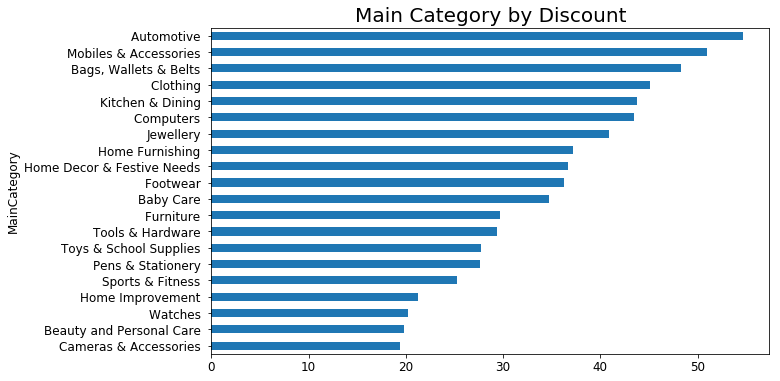

Main Category by Discount (Percentage)

MainCategory
Automotive                54.649901
Mobiles & Accessories     51.001185
Bags, Wallets & Belts     48.271591
Clothing                  45.071301
Kitchen & Dining          43.769612
Computers                 43.464223
Jewellery                 40.891198
Home Furnishing           37.218143
Name: discount_%_mean, dtype: float64


In [524]:
plt.figure(figsize=(10,6))
MainCategoryDiscount['discount_%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Main Category by Discount',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('MainCategory',fontsize=12)
plt.show()
print('Main Category by Discount (Percentage)\n')
print(MainCategoryDiscount['discount_%_mean'].sort_values(ascending=False)[:8])

Automotive, clothing and electronics were some of the most discounted categories.

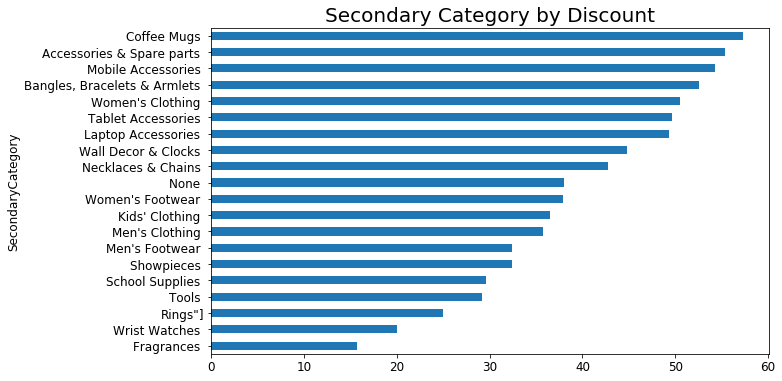

Secondary Category by Discount (Percentage)

SecondaryCategory
Coffee Mugs                      57.274172
Accessories & Spare parts        55.370314
Mobile Accessories               54.318421
Bangles, Bracelets & Armlets     52.560111
Women's Clothing                 50.500619
Tablet Accessories               49.673217
Laptop Accessories               49.320354
Wall Decor & Clocks              44.833213
Name: discount_%_mean, dtype: float64


In [525]:
plt.figure(figsize=(10,6))
SecondaryCategoryDiscount['discount_%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Secondary Category by Discount',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('SecondaryCategory',fontsize=12)
plt.show()
print('Secondary Category by Discount (Percentage)\n')
print(SecondaryCategoryDiscount['discount_%_mean'].sort_values(ascending=False)[:8])

For the secondary category, once again electronics and accessories. Some clothing, spare parts and jewellery. Coffee mugs? None is present.

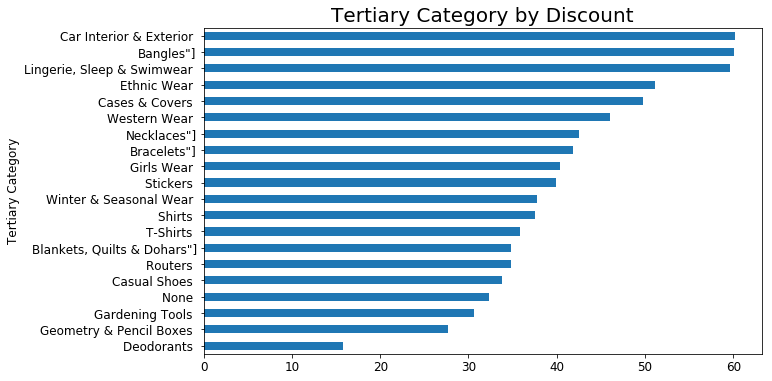

Tertiary Category by Discount (Percentage)

TertiaryCategory
Car Interior & Exterior        60.212741
Bangles"]                      60.057809
Lingerie, Sleep & Swimwear     59.606716
Ethnic Wear                    51.112810
Cases & Covers                 49.741058
Western Wear                   46.082203
Necklaces"]                    42.543918
Bracelets"]                    41.830400
Name: discount_%_mean, dtype: float64


In [526]:
plt.figure(figsize=(10,6))
TertiaryCategoryDiscount['discount_%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Tertiary Category by Discount',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Tertiary Category',fontsize=12)
plt.show()
print('Tertiary Category by Discount (Percentage)\n')
print(TertiaryCategoryDiscount['discount_%_mean'].sort_values(ascending=False)[:8])

Automotive parts on top again, followed by mostly jewellery and clothing. None is present. 

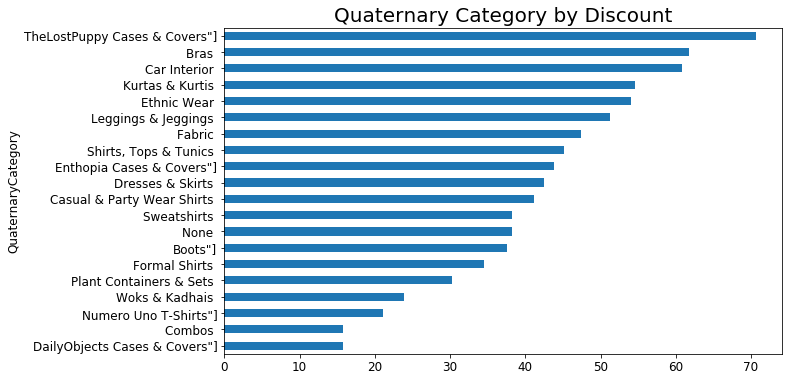

Quaternary Category by Discount (Percentage)

QuaternaryCategory
TheLostPuppy Cases & Covers"]    70.651528
Bras                             61.739034
Car Interior                     60.784170
Kurtas & Kurtis                  54.601485
Ethnic Wear                      54.036667
Leggings & Jeggings              51.212019
Fabric                           47.405738
Shirts, Tops & Tunics            45.196107
Name: discount_%_mean, dtype: float64


In [527]:
plt.figure(figsize=(10,6))
QuaternaryCategoryDiscount['discount_%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Quaternary Category by Discount',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('QuaternaryCategory',fontsize=12)
plt.show()
print('Quaternary Category by Discount (Percentage)\n')
print(QuaternaryCategoryDiscount['discount_%_mean'].sort_values(ascending=False)[:8])
#MainCategoryDiscount

The Quaternary category is dominated by mostly clothing, with come automotive and electric categories.

# Conclusion

Does the following analysis satisfy any of the objectives??
 
 
- The data looks complete, with little missing data. No Duplicates. 
 
- The data needed to be converted for datetime processing. More descriptive subcategories were created.
 
- The months section was missing about half of the years worth of data. No sales between July and November. The Year category only represented two years, both of which look very similar.

- The categories with the most sales were clothing (women's), electronics, jewellery and automotive. 

- Automotive, electronics, accessories and clothing held the highest discounts.

# Feedack is appreciated!! Thank you.